In [33]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [34]:
from pathlib import Path

actions = []

video_file_path = '/Users/sunukkim/PycharmProjects/sign_language_AIVision/videos'
for file in Path(video_file_path).iterdir():
    print(file.stem)
    actions.append(file.stem)

솔직하다
이십오
이십사
오빠
할아버지
이십일
마라톤
테니스
조용하다
이십팔
수영
이십칠
이십구
형
낚시
똑똑하다
이십육
수다스럽다
할머니
귀엽다
야구
친부
친모
이십이
누나
이십
권투
여동생
노래
이십삼


In [35]:
data = np.concatenate([
    np.load('dataset/seq_솔직하다_1681655684.npy'),
    np.load('dataset/seq_이십오_1681655684.npy'),
    np.load('dataset/seq_이십사_1681655684.npy'),
    np.load('dataset/seq_오빠_1681655684.npy'),
    np.load('dataset/seq_할아버지_1681655684.npy'),
    np.load('dataset/seq_이십일_1681655684.npy'),
    np.load('dataset/seq_마라톤_1681655684.npy'),
    np.load('dataset/seq_테니스_1681655684.npy'),
    np.load('dataset/seq_조용하다_1681655684.npy'),
    np.load('dataset/seq_이십팔_1681655684.npy'),
    np.load('dataset/seq_수영_1681655684.npy'),
    np.load('dataset/seq_이십칠_1681655684.npy'),
    np.load('dataset/seq_이십구_1681655684.npy'),
    np.load('dataset/seq_형_1681655684.npy'),
    np.load('dataset/seq_낚시_1681655684.npy'),
    np.load('dataset/seq_똑똑하다_1681655684.npy'),
    np.load('dataset/seq_이십육_1681655684.npy'),
    np.load('dataset/seq_수다스럽다_1681655684.npy'),
    np.load('dataset/seq_할머니_1681655684.npy'),
    np.load('dataset/seq_귀엽다_1681655684.npy'),
    np.load('dataset/seq_야구_1681655684.npy'),
    np.load('dataset/seq_친부_1681655684.npy'),
    np.load('dataset/seq_친모_1681655684.npy'),
    np.load('dataset/seq_이십이_1681655684.npy'),
    np.load('dataset/seq_누나_1681655684.npy'),
    np.load('dataset/seq_이십_1681655684.npy'),
    np.load('dataset/seq_권투_1681655684.npy'),
    np.load('dataset/seq_여동생_1681655684.npy'),
    np.load('dataset/seq_노래_1681655684.npy'),
    np.load('dataset/seq_이십삼_1681655684.npy')
], axis=0)

data.shape

(65568, 30, 100)

In [36]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(65568, 30, 99)
(65568,)


In [37]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(65568, 30)

In [38]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(59011, 30, 99) (59011, 30)
(6557, 30, 99) (6557, 30)


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten

model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=x_train.shape[1:]),
    MaxPooling1D(3),
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 28, 64)            19072     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 9, 64)             0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 9, 64)             33024     
_________________________________________________________________
dropout_10 (Dropout)         (None, 9, 64)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)               

In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Train on 59011 samples, validate on 6557 samples
Epoch 1/50
59008/59011 [============================>.] - ETA: 0s - loss: 1.4963 - acc: 0.5461
Epoch 00001: val_acc improved from -inf to 0.73906, saving model to models/model.h5
59011/59011 [==============================] - 113s 2ms/sample - loss: 1.4963 - acc: 0.5461 - val_loss: 0.6489 - val_acc: 0.7391
Epoch 2/50
59008/59011 [============================>.] - ETA: 0s - loss: 0.7073 - acc: 0.7266
Epoch 00002: val_acc improved from 0.73906 to 0.75888, saving model to models/model.h5
59011/59011 [==============================] - 152s 3ms/sample - loss: 0.7073 - acc: 0.7266 - val_loss: 0.5091 - val_acc: 0.7589
Epoch 3/50
59008/59011 [============================>.] - ETA: 0s - loss: 0.5704 - acc: 0.7502
Epoch 00003: val_acc improved from 0.75888 to 0.78481, saving model to models/model.h5
59011/59011 [==============================] - 160s 3ms/sample - loss: 0.5705 - acc: 0.7501 - val_loss: 0.3885 - val_acc: 0.7848
Epoch 4/50
59008/5901

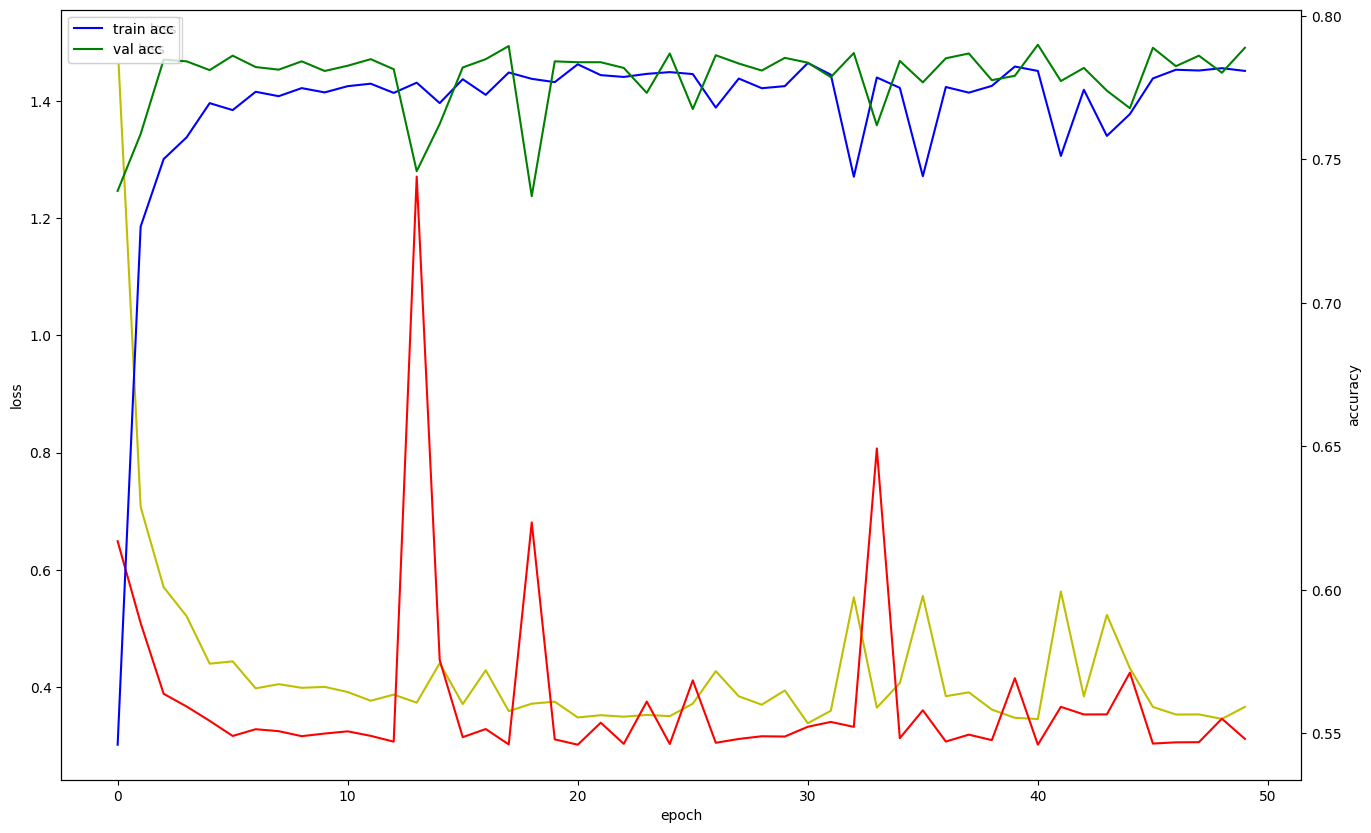

In [41]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [42]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[6404,    0],
        [   0,  153]],

       [[6348,   40],
        [ 124,   45]],

       [[6369,    3],
        [ 184,    1]],

       [[6386,    0],
        [   0,  171]],

       [[6405,    0],
        [   0,  152]],

       [[6386,   12],
        [ 151,    8]],

       [[6386,    0],
        [   0,  171]],

       [[6378,    0],
        [   0,  179]],

       [[6380,    0],
        [   0,  177]],

       [[6243,  168],
        [   4,  142]],

       [[6371,    0],
        [   0,  186]],

       [[6365,   19],
        [ 154,   19]],

       [[6202,  165],
        [   4,  186]],

       [[6392,    0],
        [   0,  165]],

       [[6395,    0],
        [   0,  162]],

       [[6378,    0],
        [   0,  179]],

       [[6343,   53],
        [ 121,   40]],

       [[6385,    0],
        [   0,  172]],

       [[6411,    0],
        [   0,  146]],

       [[6384,    0],
        [   0,  173]],

       [[6372,    0],
        [   0,  185]],

       [[6379,    0],
        [   